## E-Cell4 fundamental components
There are three fundamental components to understand E-Cell4.
That's **Model**, **World**, **Simulator**.
These components describe concepts for the simulation.

**Model** as its name suggests, describes the matter to simulate.  
**World** describes the state. For example, initial state or a state of a time-point.  
**Simulator** describes the solver and algorithm.

These three components are independent, but **World** is often combined with **Simulator**. (the reason discussed below)

## A basic model in E-Cell 4

**Model** is composed of a variety of **Species** and **ReactionRule**s.

**Species** describes the molecule entities (e.g. protein, compound) in the model. **Species** also has its attributes like molecule size.  
**ReactionRule** describes the interactions between the **Species** (e.g. association, dissociation).

## Species

We'll show you how to create **Species**.

In [66]:
from ecell4 import *

A = Species("A")
B = Species("B")

each expression describes a **Species** named **A** or **B**.
**A** describes not a specific molecule, but a type of molecule.
#### Caution
Species name(we call this **Serial**) has a number of naming rules,
The naming requires attention to use special symbol (e.g. parenthesis **()**, dot **.**, underbar **_**, numbers, and space.

<hr>

You can add attributes to Species,

In [67]:
A = Species("A")
A.set_attribute("radius", "0.005")
A.set_attribute("D", "1")
A.set_attribute("location", "cytoplasm")

The 1st argument for **set_attribute** is the name of attribute.
The 2nd argument is the value.
Both have to be string.

Radius, diffusion coefficient, location are frequently used, so there is a shortcut for this.

In [68]:
A = Species("A", "0.005", "1", "cytoplasm")  # XXX: serial, radius, D, location

When you want to inspect the **Species** attributes, please write as follows.

In [69]:
print(A.serial())  # will return 'A'
print(A.get_attribute("D"))  # will return '1'

A
1


## ReactionRule
ReactionRule describes the transition of the molecule types from **Reactants** to **Products**. ReactionRule requires at least a kinetic rate attribute, this has to be number.

In [70]:
rr = ReactionRule()
rr.add_reactant(Species("A"))
rr.add_product(Species("B"))
rr.set_k(1.0)

Now you created a reaction from **A** to **B**. In this reaction definition, you don't need to assign values to **Species**.

You can also create a binding reaction as follows

In [71]:
rr = ReactionRule()
rr.add_reactant(Species("A"))
rr.add_reactant(Species("B"))
rr.add_product(Species("C"))
rr.set_k(1.0)

A Binding **A** and **B** creates **C**. There are utility functions for binding and unbinding **ReactionRule**s.

In [72]:
rr1 = create_unimolecular_reaction_rule(Species("A"), Species("B"), 1.0)
rr2 = create_binding_reaction_rule(Species("A"), Species("B"), Species("C"), 1.0)
rr3 = create_binding_reaction_rule(Species("C"), Species("A"), Species("B"), 1.5)

When you want to inspect the **ReactionRule**, please use **as_string** function.

In [73]:
print(rr3.as_string())  # will return 'C+A>B|1.5'

C+A>B|1.5


## NetworkModel

Now you have created components for a **Model**, next we register these components on a **Model**.

In [74]:
sp1 = Species("A", "0.005", "1")
sp2 = Species("B", "0.005", "1")
sp3 = Species("C", "0.01", "0.5")
rr1 = create_binding_reaction_rule(Species("A"), Species(b"B"), Species("C"), 0.01)
rr2 = create_unbinding_reaction_rule(Species("C"), Species("A"), Species("B"), 0.3)

m = NetworkModel()
m.add_species_attribute(sp1)
m.add_species_attribute(sp2)
m.add_species_attribute(sp3)
m.add_reaction_rule(rr1)
m.add_reaction_rule(rr2)


To add a **Species**, use **add_species_attribute**.
To add a **ReactionRule**, use **add_reaction_rule**.
Now you created a **Model** for simple association and dissociation.

To inspect a **Model**, use **species_attributes**, **reaction_rules**, and **num_reaction_rules()**.

In [75]:
print(m.species_attributes())
print(m.reaction_rules())
m.num_reaction_rules()

# will return like:
# [<ecell4.core.Species object at 0x7f36443bfa98>, <ecell4.core.Species object at 0x7f36443bfab0>, <ecell4.core.Species object at 0x7f36443bfac8>]
# [<ecell4.core.ReactionRule object at 0x7f36443bfa98>, <ecell4.core.ReactionRule object at 0x7f36443bfab0>]
# 2

[<ecell4.core.Species object at 0x1165b3a68>, <ecell4.core.Species object at 0x1165b3ac8>, <ecell4.core.Species object at 0x1165b3ae0>]
[<ecell4.core.ReactionRule object at 0x1165b3a68>, <ecell4.core.ReactionRule object at 0x1165b3ac8>]


2

NetworkModel also contains Species attributes. These attributes are indispensable for particle and lattice simulations, but not necessarily needed for gillespie and ode.

NetworkModel attributes a Species based on the registered Species.

## A simple simulation with E-Cell4

Yet we have not explained **World** and **Simulator**, we show you a simple simulation result.

E-Cell4 has a utility function named **run_simulation** for simple demo.
This function runs on an environment installed IPython Notebook and matplotlib.

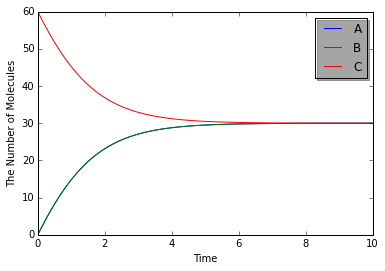

In [76]:
%matplotlib inline
# XXX: 'm' is a NetworkModel, which is described in Model tutorial (http://nbviewer.ipython.org/github/ecell/ecell4/blob/develop/ipynb/Tutorials/ModelBasics.ipynb) .

import numpy
t = numpy.linspace(0, 10, 100)  # [0.0, 0.1, 0.2, ..., 9.9, 10.0]
y = run_simulation(t, {'C': 60}, volume=1.0, model=m)

**run_simulation** records the number of molecules for time **t** and plots the time-series simulation result.
In this case, we recorded the simulation for 10 seconds per 0.1 second.
The second argument is initial value. We started the simulation from the 60 **C** molecules.
**volume** is the volume for this simulation, and we set a network model to **model**.

You can also plot stochastic simulation result.

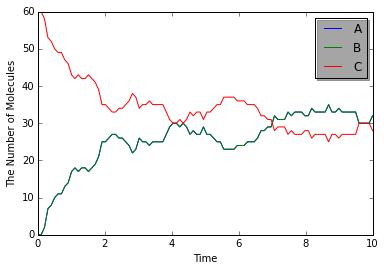

In [77]:
y = run_simulation(t, {'C': 60}, volume=1.0, model=m, solver='gillespie')

You can simalate a model with different methods like this.
E-Cell system completely separates the model and simulation methods.


## Special model notation in E-Cell4

We created **Species** and **ReactionRule**, then set them to **NetworkModel** and simulated it.
But the model description is cumbersome even in simple association and dissociation.

So E-Cell4 has shortcuts to describe this model.
Here we show a shortcut about **ReactionRule**.
Before using the shortcut, please remove the reactant Species **A** and **B** we created in global scope above.
(You don't need to remove the product **C**)

In [78]:
del A
del B

In [79]:
with reaction_rules():
    A + B > C | 0.01  # equivalent to create_binding_reaction_rule
    C > A + B | 0.3   # equivalent to create_unbinding_reaction_rule

m = get_model()

Please use **with** statement for E-Cell4 special notation.
You can use special notation under this **with** scope.
Please remember to write **()** after **reaction_rules**.

The syntax speaks for itself. The number after separator **|** is kinetic constant.
The syntax must be valid Python, so take care in using line breaks.

If you do NOT `del A` and `del B`, `A + B` is expanded to `Species("A")` + `Species("B")`.  
This causes an error like `TypeError: unsupported operand type(s) for +: 'ecell4.core.Species' and 'ecell4.core.Species'`.  
Do not forget to `del A` and `del B` if you created **Species** **A** and **B** above.

For reversible reaction, please use **==**

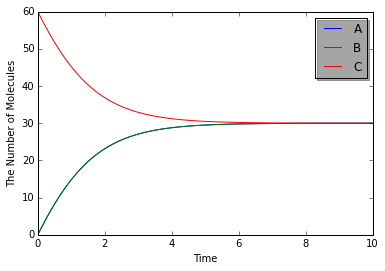

In [80]:
with reaction_rules():
    A + B == C | (0.01, 0.3)

y = run_simulation(numpy.linspace(0, 10, 100), {'C': 60}, volume=1.0)

$$\frac{\mathrm{d[A]}}{\mathrm{d}t}=\frac{\mathrm{d[B]}}{\mathrm{d}t}=-0.01\mathrm{[A][B]}+0.3\mathrm{[C]}\\
\frac{\mathrm{d[C]}}{\mathrm{d}t}=+0.01\mathrm{[A][B]}-0.3\mathrm{[C]}$$

In reversible reaction, you need to set two kinetic constant after the separator.
When you do NOT set the **model** to **run_simulation** function, **run_simulation** calls **get_model()** automatically. So in this case we skipped.

## Notations about synthesis and degradation

In the absence of left or right side of molecules like synthesis or degradation,
you may write the model like


```python
with reaction_rules():
    A > | 1.0  # XXX: will throw SyntaxError
    > A | 1.0  # XXX: will throw SyntaxError
```

but this must return `SyntaxError: invalid syntax`

For synthesis and degradation, please use special character `~`.
`~` sets the following molecule stoichiometric coefficient 0.

In [81]:
with reaction_rules():
    A > ~A | 1.0  # XXX: create_degradation_reaction_rule
    ~A > A | 1.0  # XXX: create_synthesis_reaction_rule

$$\frac{\mathrm{d[A]}}{\mathrm{d}t}=1.0-1.0\mathrm{[A]}$$